## Clasificación del conjunto de datos *Iris*

El problema de clasificación **Iris** es uno de los ejemplos más conocidos en el ámbito del aprendizaje automático. Se utiliza con frecuencia para mostrar cómo un modelo puede aprender a **distinguir entre clases similares**.

Este conjunto de datos contiene **150 muestras** de flores pertenecientes a **tres especies**: *Iris setosa*, *Iris versicolor* e *Iris virginica*.
Cada flor se describe mediante **cuatro características**:

- Longitud del sépalo
- Ancho del sépalo
- Longitud del pétalo
- Ancho del pétalo

Estas variables permiten al modelo identificar patrones que diferencian a cada especie.

---

### Hiperparámetros utilizados

| Parámetro | Valor |
|----------|-------|
| Optimizador | Adagrad |
| Tasa de aprendizaje | 0.03 |
| Número de épocas | 1000 |
| Función de activación | Leaky ReLU |
| Arquitectura de la red | 3 capas |
| Neuronas por capa | 4 → 10 → 3 |


In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [21]:
from main.neural_network.neural_network import train, create_nn, test_nn
from main.neural_network.layers.activation.functions import Tanh, LeakyRelu, Sigmoid, Relu
from main.neural_network.utils.graphics.regression import learning_curve
from main.neural_network.optimizers.rmsprop import RMSProp
from main.neural_network.optimizers.sgd import SGD
from main.neural_network.optimizers.momentum import Momentum
from main.neural_network.optimizers.adagrad import Adagrad
from main.neural_network.losses.cross_entropy import CrossEntropyLoss
from sklearn.model_selection import train_test_split
from main.neural_network.utils.graphics.classification import display_confusion_matrix
from main.neural_network.utils.categorical import to_categorical

In [22]:
X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


X_train = np.reshape(X_train, (112, 4, 1))
X_test = np.reshape(X_test, (38, 4, 1))

y_train = np.reshape(y_train, (112, 3, 1))
y_test = np.reshape(y_test, (38, 3, 1))

sample_df = pd.DataFrame(X_train[:, :, 0], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
sample_df['Class'] = np.argmax(y_train[:, :, 0], axis=1)

class_counts = sample_df['Class'].value_counts()
styled_table = sample_df.head(10).style.set_table_attributes('style="width:70%"').set_caption("Primeras 10 muestras")
styled_table = styled_table.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '12pt'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '10pt'), ('text-align', 'center')]
}])

display(styled_table)
print("--------------------------------------------------")
print(class_counts)

,Feature1,Feature2,Feature3,Feature4,Class
0,5.700000,2.600000,3.500000,1.000000,1
1,4.600000,3.600000,1.000000,0.200000,0
2,5.400000,3.400000,1.500000,0.400000,0
3,6.000000,3.000000,4.800000,1.800000,2
4,6.000000,2.900000,4.500000,1.500000,1
5,5.400000,3.400000,1.700000,0.200000,0
6,5.800000,2.600000,4.000000,1.200000,1
7,6.400000,2.800000,5.600000,2.100000,2
8,6.300000,2.900000,5.600000,1.800000,2
9,5.600000,2.800000,4.900000,2.000000,2


--------------------------------------------------
1    41
2    38
0    33
Name: Class, dtype: int64


In [23]:
optimizers = [
    Adagrad(learning_rate=0.04),
    Adagrad(learning_rate=0.07),
    Adagrad(learning_rate=0.07)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 10, 3], activation_function=activations, optimizers=optimizers)
train_loss = train(nn, loss, X_train, y_train, epochs=1000)

In [24]:
y_true, y_pred = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 100.0%


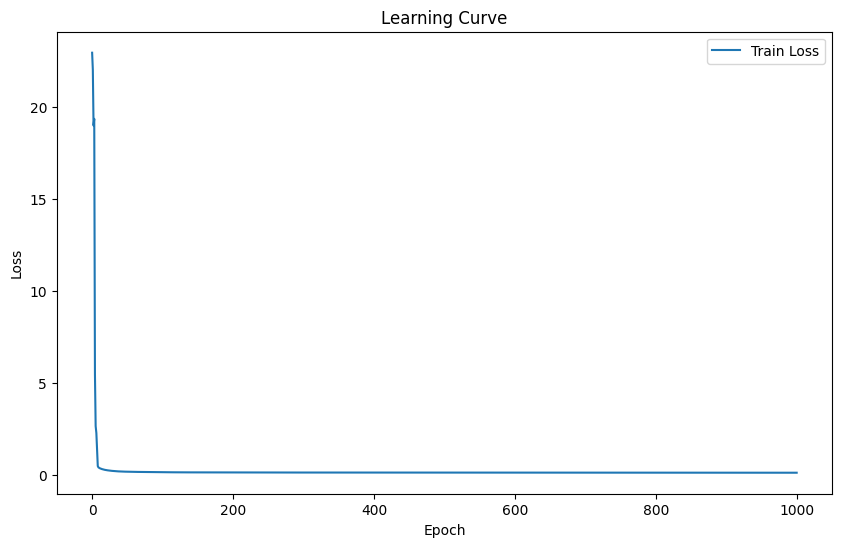

In [25]:
learning_curve(train_loss)

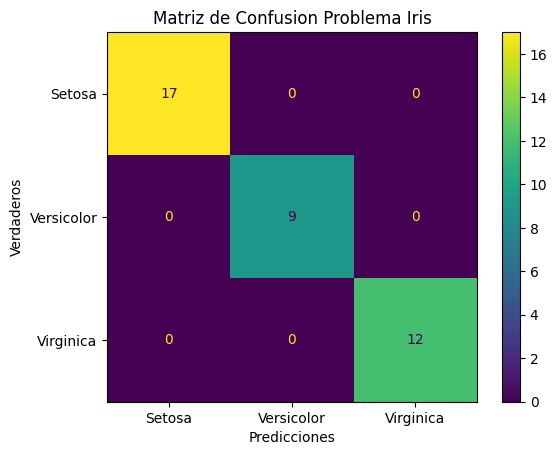

In [26]:
display_confusion_matrix(y_true, y_pred, ['Setosa', 'Versicolor', 'Virginica'], title='Matriz de Confusion Problema Iris')

# Experimentos

### Test1

In [27]:
optimizers = [
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03)
]

activations = [Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 4, 3], activation_function=activations, optimizers=optimizers)

In [28]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [29]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 76.32%


### Test2

In [30]:
optimizers = [
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 8, 4, 3], activation_function=activations, optimizers=optimizers)

In [31]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [32]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 97.37%


### Test3

In [33]:

optimizers = [
    Momentum(learning_rate=0.01),
    Adagrad(learning_rate=0.02)
]

activations = [Sigmoid(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 3], activation_function=activations, optimizers=optimizers)

In [34]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [35]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 97.37%


### Test4

In [36]:
optimizers = [
    Adagrad(learning_rate=0.002)
]

activations = [Relu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 3], activation_function=activations, optimizers=optimizers)

In [37]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [38]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 76.32%
